In [1]:
id2seq_file = '../type_data/protein.sequences.dictionary.both.tsv'

id2index = {}
seqs = []
index = 0
for line in open(id2seq_file):
    line = line.strip().split('\t')
    id2index[line[0]] = index
    seqs.append(line[1])
    index += 1
seq_array = []
id2_aid = {}
sid = 0

seq_size = 2000

In [ ]:
# ensp2protID = {}
# with open('../type_data/ensp2uniport.tab', 'r') as f:
#     all_lines = f.readlines()
#     for line in all_lines[1:]:
#         split_text = line.rstrip().split('\t')
#         ensp = split_text[0]
#         protID = split_text[1]
#         ensp2protID[ensp] = protID

In [2]:
with open('uniprot-all.tab.txt', 'r') as infile:
    all_lines = infile.readlines()

In [3]:
ensp2protID = {}
for line in all_lines[1:]:
    split_texts = line.split('\t')
    protID = split_texts[0]
    ensembleID = split_texts[10]
    if '9606' in ensembleID:
        ensp2protID[ensembleID] = protID

In [4]:
ensp2protID['9606.ENSP00000000233']

'P84085'

In [ ]:
# with open('ensp.txt', 'w') as f:
#     for key, value in id2index.items():
#         f.writelines(key+' ')

In [6]:
ds_file = '../type_data/protein.actions.SHS27k.tsv'
label_index = 4
sid1_index = 2
sid2_index = 3
raw_data = []
skip_head = True
x = None
count = 0
max_data = -1
limit_data = max_data > 0
for line in open(ds_file):
    if skip_head:
        skip_head = False
        continue
    line = line.rstrip('\n').rstrip('\r').split('\t')
    raw_data.append(line)
     

In [7]:
import numpy as np
seq_index1 = np.array([line[sid1_index] for line in raw_data])
seq_index2 = np.array([line[sid2_index] for line in raw_data])


In [8]:
class_map = {'reaction':0,'binding':1,'ptmod':2,'activation':3,'inhibition':4,'catalysis':5,'expression':6}
print(class_map)
class_labels = np.zeros((len(raw_data), 7))
for i in range(len(raw_data)):
    class_labels[i][class_map[raw_data[i][label_index]]] = 1.

{'reaction': 0, 'binding': 1, 'ptmod': 2, 'activation': 3, 'inhibition': 4, 'catalysis': 5, 'expression': 6}


In [11]:
np.sum(class_labels, axis=0)

array([4500., 4500., 2872., 4500., 4500., 4500., 1572.])

In [13]:
!pip install seaborn

     |████████████████████████████████| 215kB 436kB/s eta 0:00:01


In [14]:
import seaborn as sns
sns.set_style("whitegrid")

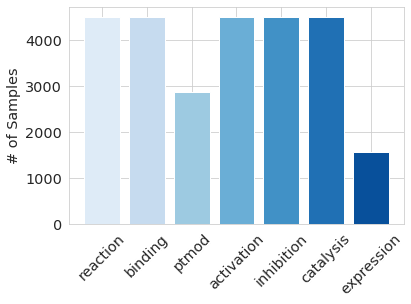

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline

x=[1,1000,1001]
y= np.sum(class_labels, axis=0)
sns.set_context(rc={"figure.figsize": (20, 12)})
nd = np.arange(7)
width=1.5
plt.xticks(nd, ('reaction','binding','ptmod', 'activation', 'inhibition', 'catalysis','expression'), rotation='vertical')
# plt.xlim(-0.15,7)
fig = plt.bar(nd, y, color=sns.color_palette("Blues",7))
plt.xticks(rotation=45)
plt.ylabel('# of Samples')
plt.savefig('shs27k_barplot.png')
plt.savefig('shs27k_barplot.pdf')
# plt.legend(fig, ['First','Second','Third'], loc = "upper left")

In [9]:
ensp1 =  [line[sid1_index] for line in raw_data]
ensp2 =  [line[sid2_index] for line in raw_data]


In [ ]:
# np.savez('SHS27k', ensp1 = ensp1, ensp2=ensp2, labels = class_labels)

In [10]:
unique_ensp = set(ensp1 + ensp2)

In [11]:
used_ensp2prot = {}
unknown_ensp = []
for ensp in unique_ensp:
    if ensp not in ensp2protID.keys():
        unknown_ensp.append(ensp)
    else:
        used_ensp2prot[ensp] = ensp2protID[ensp]
print(len(unknown_ensp))

110


In [12]:
import requests, sys
import json
from tqdm import tqdm

remain_proteins = []
for t in tqdm(unknown_ensp):
    url_base = 'https://www.ebi.ac.uk/ebisearch/ws/rest/proteinSequences/?query='
    url_base += t[5:]
    url_base += '&size=15&format=JSON&fieldurl=true&viewurl=true&fields=name&hlfields=description&entryattrs=score'
    requestURL =  url_base
    r = requests.get(requestURL, headers={ "Accept" : "application/json"})
    if r.ok:
        responseBody = r.text
        data=json.loads(responseBody)
        for entries in data['entries']:
            if entries['source'] == 'uniprot':
             
                if t not in used_ensp2prot.keys():
                    used_ensp2prot[t] = entries['acc']
                else:
                    break
        if  data['hitCount'] == 0:
            remain_proteins.append(t)
    else:
        remain_proteins.append(t) 
 

100%|██████████| 110/110 [02:03<00:00,  1.12s/it]


In [13]:
remain_proteins

['9606.ENSP00000262946',
 '9606.ENSP00000289352',
 '9606.ENSP00000239730',
 '9606.ENSP00000293276',
 '9606.ENSP00000303779',
 '9606.ENSP00000304994',
 '9606.ENSP00000292095',
 '9606.ENSP00000227256',
 '9606.ENSP00000293280',
 '9606.ENSP00000264487',
 '9606.ENSP00000317912',
 '9606.ENSP00000290575',
 '9606.ENSP00000277491',
 '9606.ENSP00000229824',
 '9606.ENSP00000316590',
 '9606.ENSP00000311493',
 '9606.ENSP00000244601',
 '9606.ENSP00000306241',
 '9606.ENSP00000244661',
 '9606.ENSP00000259791']

In [ ]:
# used_ensp2prot['9606.ENSP00000259791'] = 'P04908'
# used_ensp2prot['9606.ENSP00000244661'] = 'P68431'
# used_ensp2prot['9606.ENSP00000244601'] = 'P06899'
# used_ensp2prot['9606.ENSP00000239730'] = ''
# used_ensp2prot['9606.ENSP00000229824'] = 'Q7Z6P3'


In [14]:
used_ensp2prot['9606.ENSP00000293276'] = 'Q16663'
used_ensp2prot['9606.ENSP00000227256'] = 'A6NMT0'

used_ensp2prot['9606.ENSP00000317912'] = 'Q9UGK3'
used_ensp2prot['9606.ENSP00000316590'] = 'Q8WX69'

used_ensp2prot['9606.ENSP00000293280'] = 'P55773'
used_ensp2prot['9606.ENSP00000311493'] = 'Q53S48'


used_ensp2prot['9606.ENSP00000293276'] = 'Q16663'
used_ensp2prot['9606.ENSP00000229824'] = 'Q7Z6P3'


used_ensp2prot['9606.ENSP00000306241'] = ''
used_ensp2prot['9606.ENSP00000259791'] = 'P04908'


used_ensp2prot['9606.ENSP00000292095'] = 'P56817'
used_ensp2prot['9606.ENSP00000244661'] = 'P68431'



used_ensp2prot['9606.ENSP00000304994'] = 'Q9UI36'
used_ensp2prot['9606.ENSP00000239730'] = ''
used_ensp2prot['9606.ENSP00000290575'] = 'P00736'
used_ensp2prot['9606.ENSP00000262946'] = 'O14957'
used_ensp2prot['9606.ENSP00000303779'] = 'A4GXA9'
used_ensp2prot['9606.ENSP00000264487'] = 'P15514'
used_ensp2prot['9606.ENSP00000244601'] = 'P06899'
used_ensp2prot['9606.ENSP00000289352'] = 'P62805'

In [15]:
import requests, sys
import json
from tqdm import tqdm
ensemble2go_terms = {}
remain_proteins = []
for key in tqdm(used_ensp2prot.keys()):
    t = used_ensp2prot[key]
    if len(t) > 0:
        requestURL = "https://www.ebi.ac.uk/QuickGO/services/annotation/search?geneProductId="+t
        r = requests.get(requestURL, headers={ "Accept" : "application/json"})
        if r.ok:
            responseBody = r.text
            data=json.loads(responseBody)
            for k in data['results']: 
                go_id = k['goId'] 
                if key not in ensemble2go_terms.keys():
                    ensemble2go_terms[key] = go_id
                else:
                    ensemble2go_terms[key] = ensemble2go_terms[key] + ';' + go_id
            if len(data['results']) == 0:
                remain_proteins.append(key)
        else:
            remain_proteins.append(key)
    else:
        ensemble2go_terms[key] = ''

100%|██████████| 5188/5188 [1:35:37<00:00,  1.11s/it]  


In [16]:
ensemble2go_terms['9606.ENSP00000227256']

'GO:0000981;GO:0000790;GO:0000981;GO:0021515;GO:0006357;GO:0021521;GO:0006357;GO:0006355;GO:0043565;GO:0003677;GO:0005634;GO:0007275;GO:0003677;GO:0003677;GO:0005634'

In [17]:
from six.moves import cPickle as pickle #for performance

 
def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

def load_dict(filename_):
    with open(filename_, 'rb') as f:
        ret_di = pickle.load(f)
    return ret_di

In [18]:
remain_proteins

['9606.ENSP00000304923',
 '9606.ENSP00000269025',
 '9606.ENSP00000216923',
 '9606.ENSP00000295628',
 '9606.ENSP00000310146',
 '9606.ENSP00000302478',
 '9606.ENSP00000299443',
 '9606.ENSP00000269127',
 '9606.ENSP00000318635',
 '9606.ENSP00000300976',
 '9606.ENSP00000254835',
 '9606.ENSP00000290390',
 '9606.ENSP00000296144',
 '9606.ENSP00000309501',
 '9606.ENSP00000302077',
 '9606.ENSP00000317431',
 '9606.ENSP00000290943',
 '9606.ENSP00000306752']

In [19]:
for enspid in remain_proteins:
    ensemble2go_terms[enspid] = ''

In [20]:
save_dict(ensemble2go_terms, 'ensemble2go_terms_SHS148k.pkl')

In [21]:
id2seq_file = '../type_data/protein.sequences.dictionary.both.tsv'

id2seqs = {}
 
for line in open(id2seq_file):
    line = line.strip().split('\t')
    id2seqs[line[0]] = line[1]
    

In [22]:
save_dict(id2seqs, 'ensemble2seqs_SHS148k.pkl')

In [ ]:
# !wget https://stringdb-static.org/download/protein.aliases.v11.0.txt.gz

In [ ]:
# !gunzip protein.aliases.v11.0.txt.gz

In [ ]:
# !wget http://159.226.67.237/sun/varcards/resource/data/uniprot-all.tab.txt

In [ ]:
# !wget ftp://ftp.ebi.ac.uk/pub/databases/intact/current/psimitab/intact.txt

In [ ]:
# https://www.ebi.ac.uk/ebisearch/ws/rest/proteinSequences/?query=ENSP00000000233&size=15&format=JSON&fieldurl=true&viewurl=true&fields=name&hlfields=description&entryattrs=score